In [52]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Helper Function

In [2]:
def plot_hist(df, name=None):
    fig,ax = plt.subplots(figsize=(10, 10))
    counts = df.value_counts()
    p = ax.barh(counts.index, counts)
    ax.bar_label(p)
    title = f"histogram\nType: #{len(df.unique())}"
    if name is not None:
        title = " ".join([name, title])
    ax.set_title(title)
    plt.show()

In [3]:
dataset_dir = 'and_dataset'
train_name = 'train_df.csv'

In [4]:
train_df = pd.read_csv(os.path.join(dataset_dir, train_name), index_col=False)
train_df = train_df.drop('index', 1)
train_df

,file_name,class,state,label
0,10000.png,transistor,good,transistor-good
1,10001.png,capsule,good,capsule-good
2,10002.png,transistor,good,transistor-good
3,10003.png,wood,good,wood-good
4,10004.png,bottle,good,bottle-good
...,...,...,...,...
4272,14272.png,transistor,good,transistor-good
4273,14273.png,transistor,good,transistor-good
4274,14274.png,grid,good,grid-good
4275,14275.png,zipper,good,zipper-good


### class 히스토그램 시각화

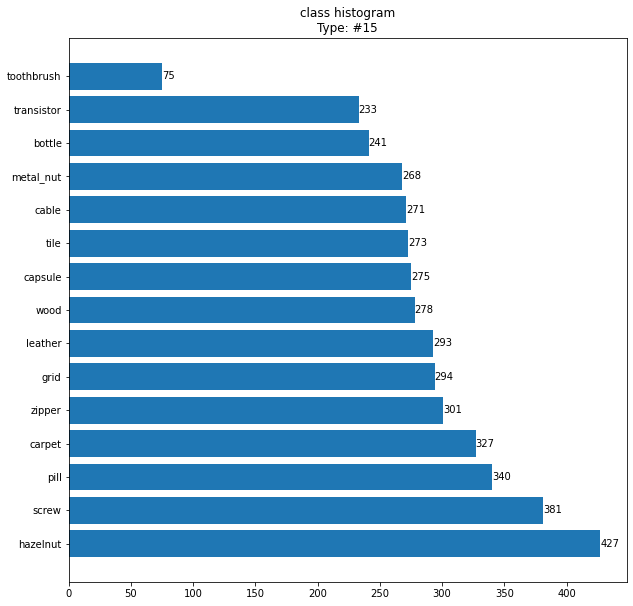

In [48]:
plot_hist(train_df["class"], "class")

### state 히스토그램 시각화

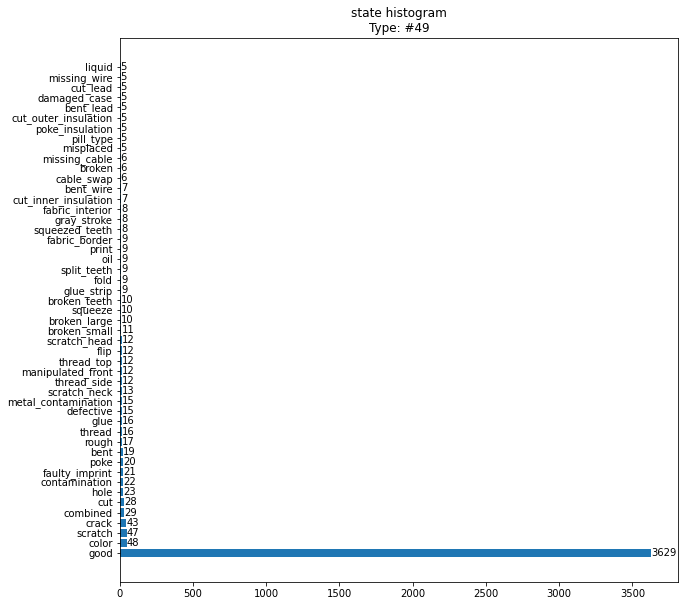

In [49]:
plot_hist(train_df['state'], "state")

### class-state 별 히스토그램 시각화

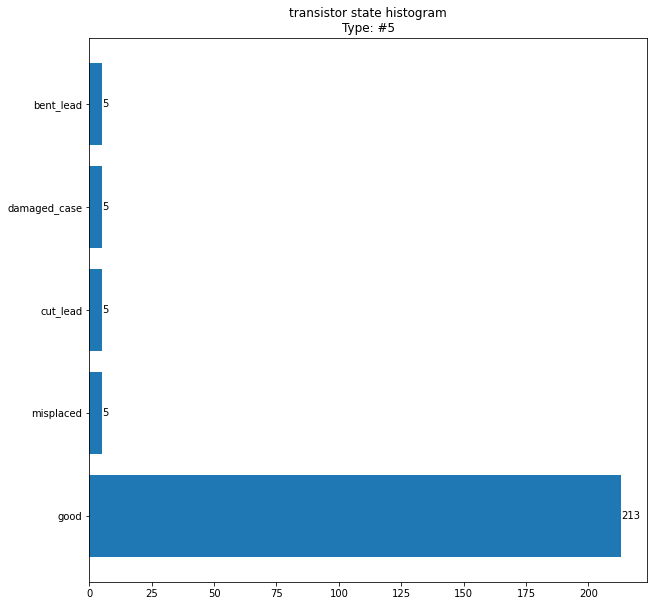

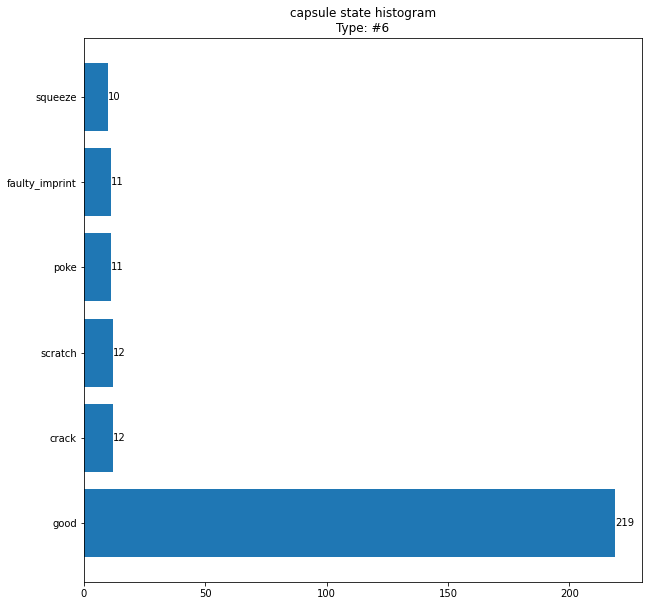

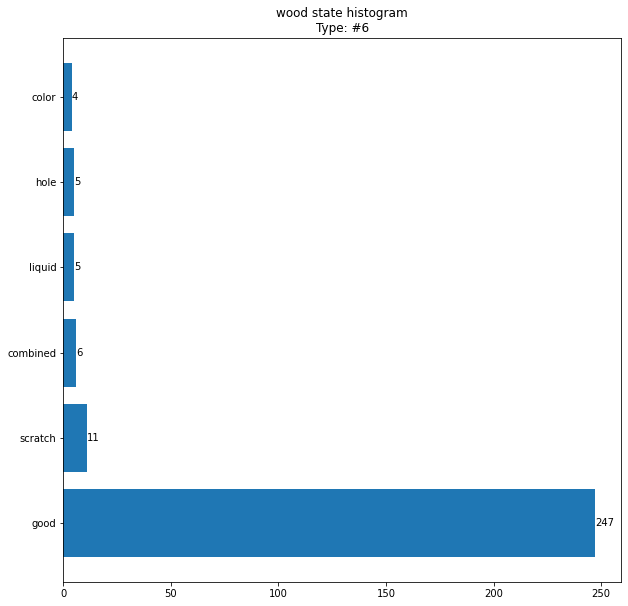

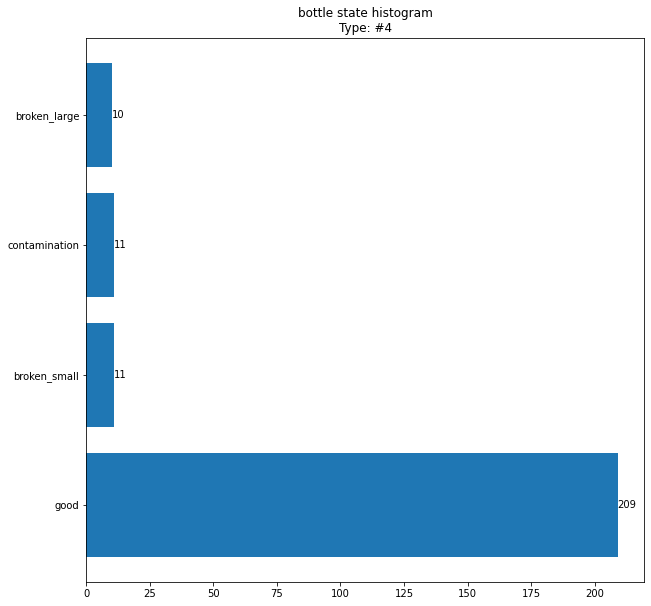

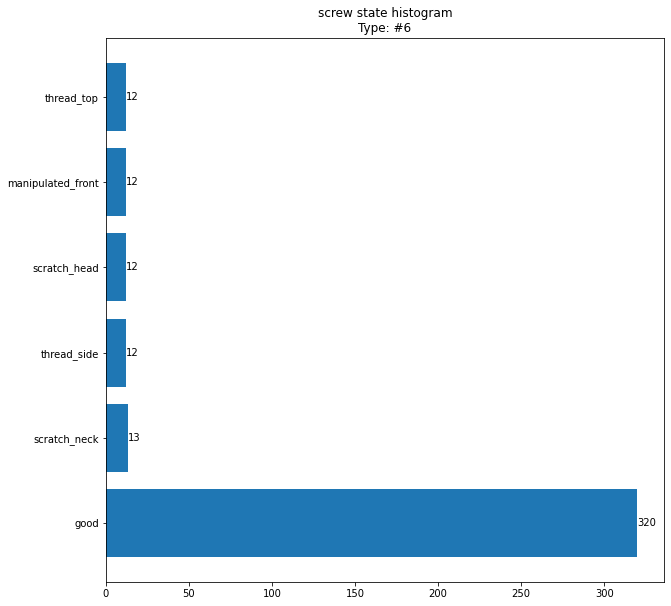

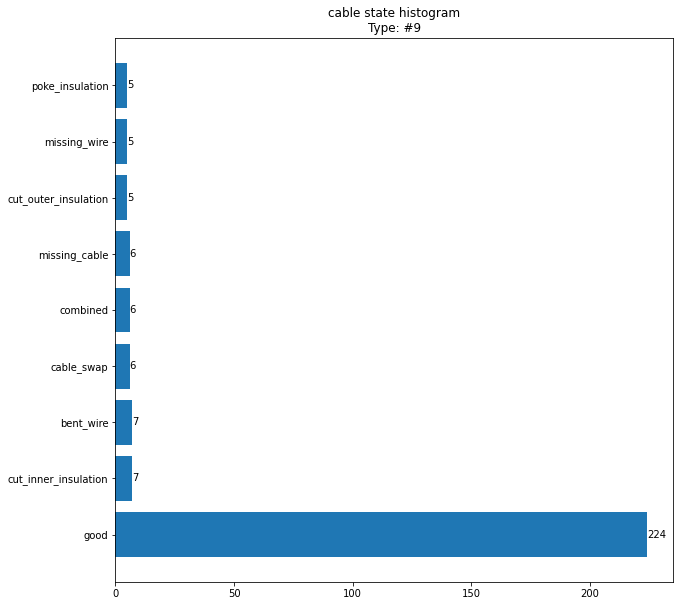

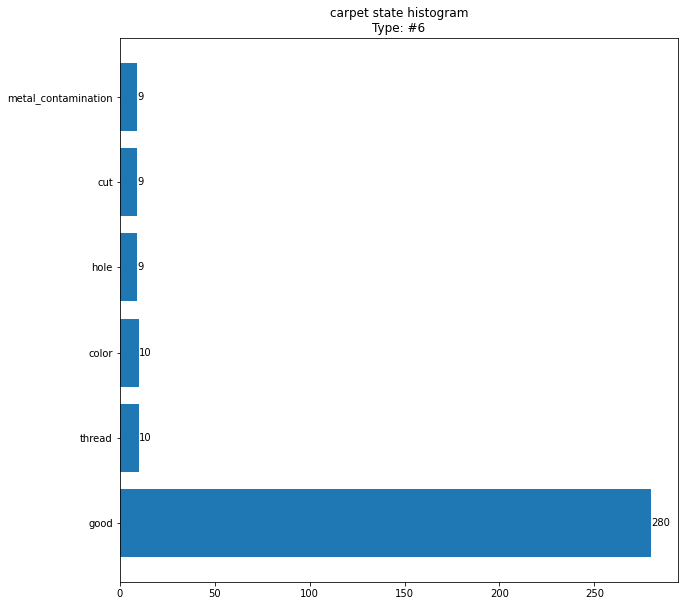

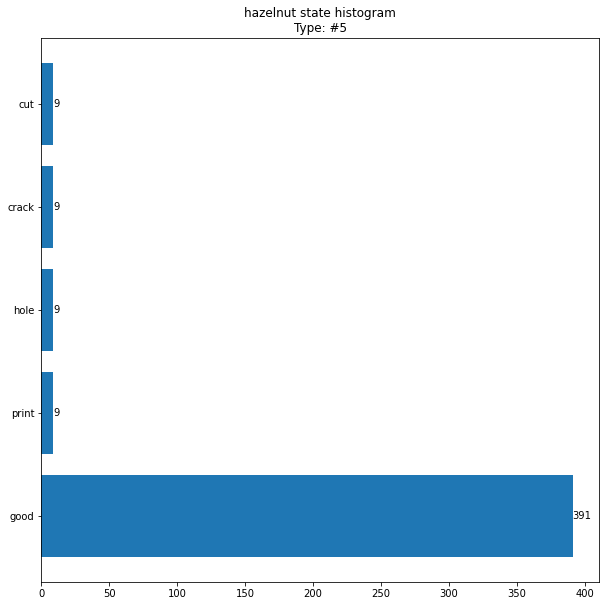

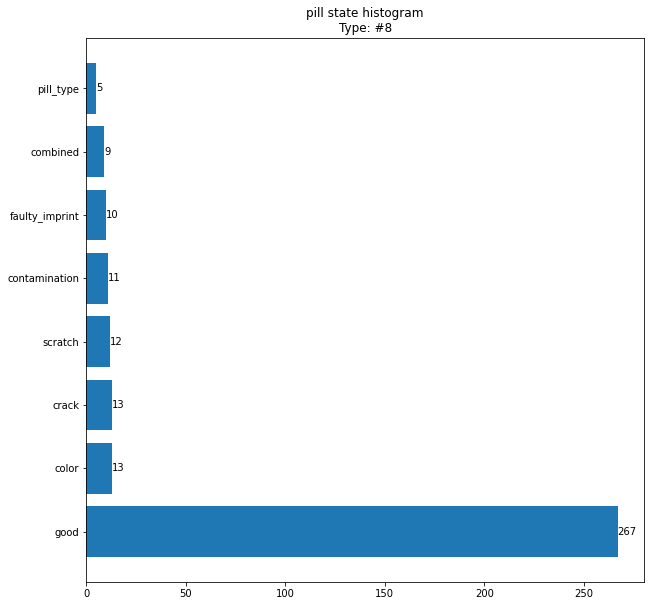

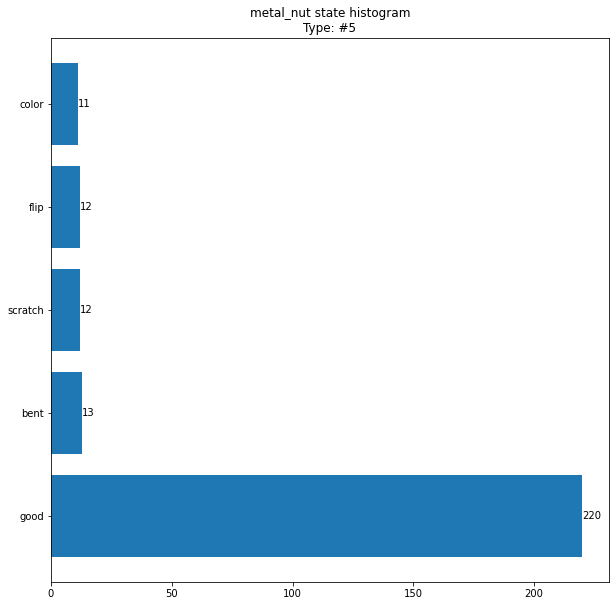

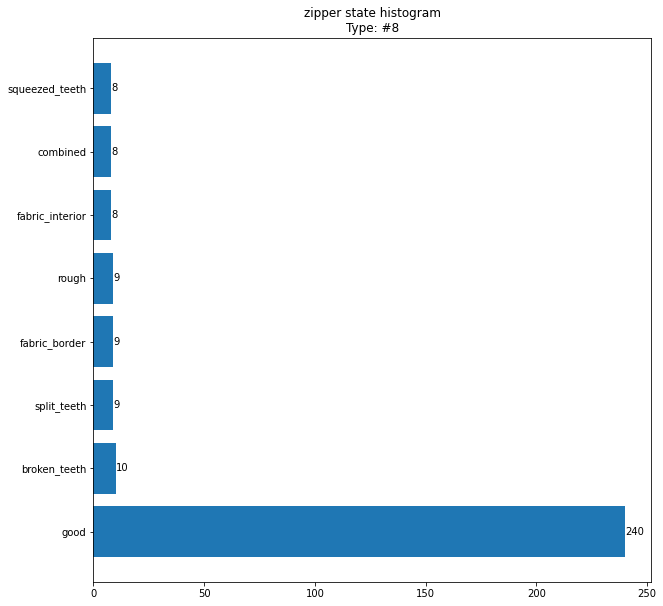

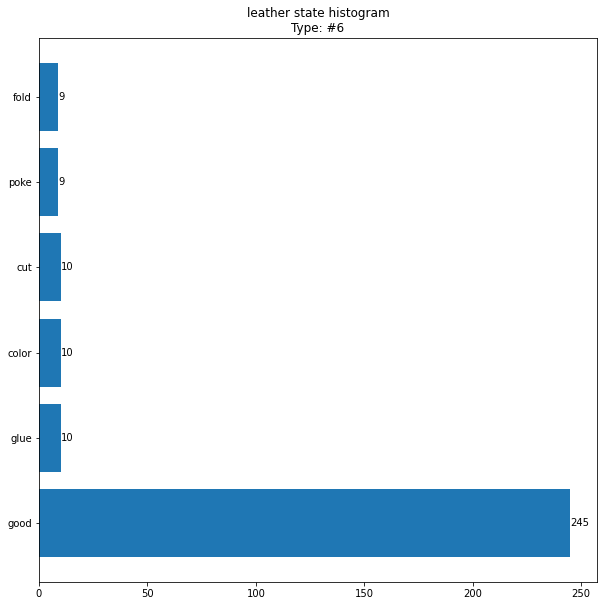

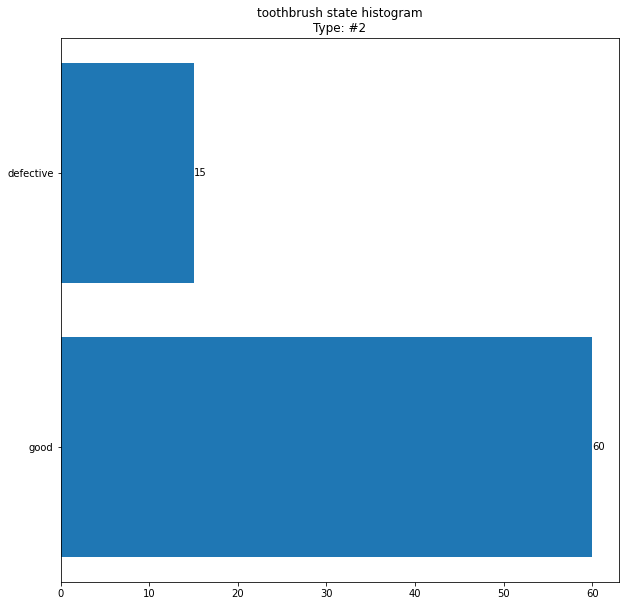

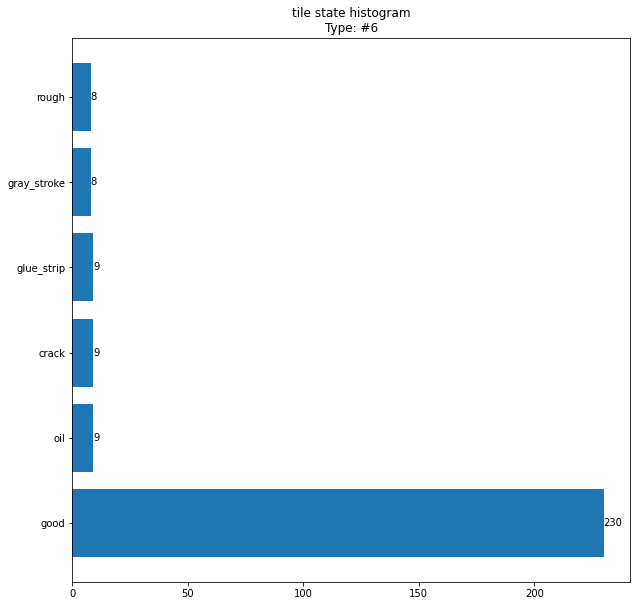

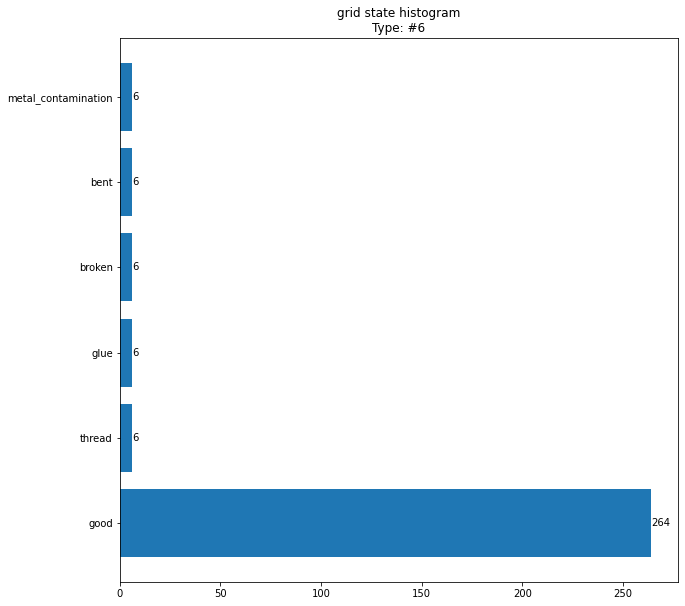

In [5]:
# class(장비) 별 state histogram
for cls in train_df['class'].unique():
    plot_hist(train_df[train_df['class'] == cls]['state'], " ".join([cls, "state"]))

In [118]:
a = train_df[train_df['class'] == 'pill'].reset_index(drop=True)

In [156]:
b = a['state'].unique()

In [157]:
index

array([], dtype=int64)

## 이미지 시각화

In [162]:
def visualize(df):
    state_unique = df['state'].unique()
    index = np.where(state_unique == 'good')[0]
    state_unique[[0, index[0]]] = state_unique[[index[0], 0]]
    
    cls = df['class'][0]
    
    fig, ax = plt.subplots(2, len(state_unique), figsize=(15,6))
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.suptitle(cls, size=20)
    
    for i, s in enumerate(state_unique):
        tmp = df[df['state'] == s]['file_name'].reset_index(drop=True)
        path = os.path.join(dataset_dir, 'train', tmp[0])
        ax[0, i].imshow(cv2.imread(path))
        path = os.path.join(dataset_dir, 'train', tmp[1])
        ax[1, i].imshow(cv2.imread(path))
        
        ax[0, i].set_title(s)
    plt.show()

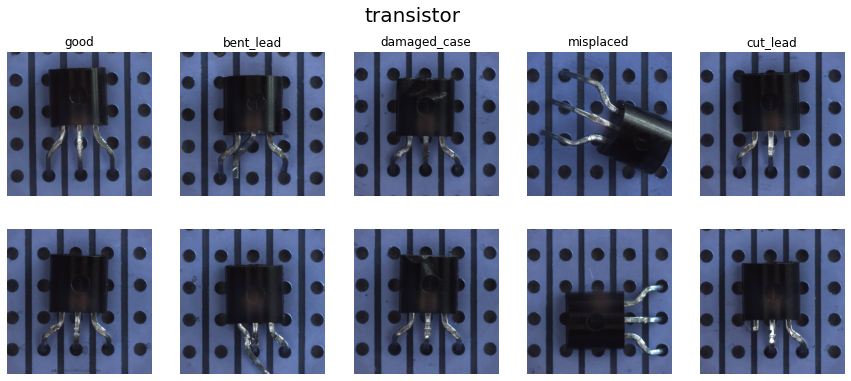

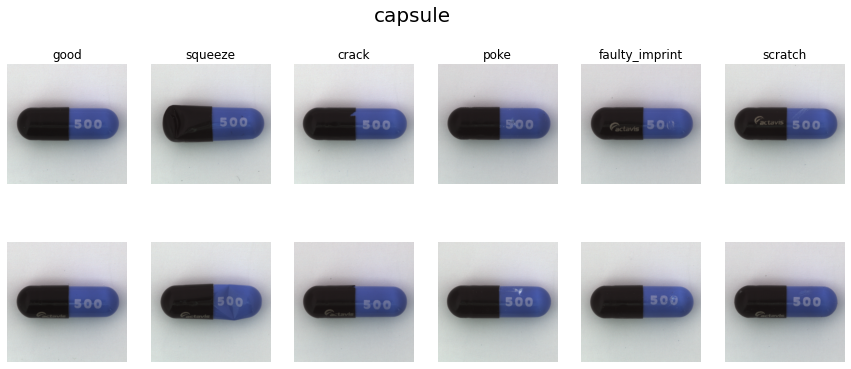

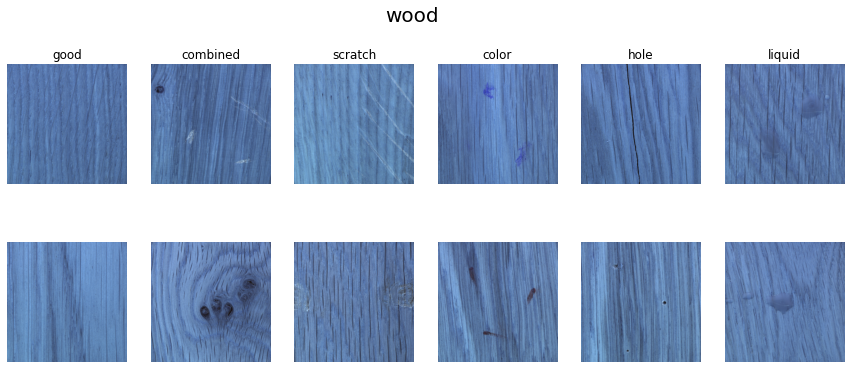

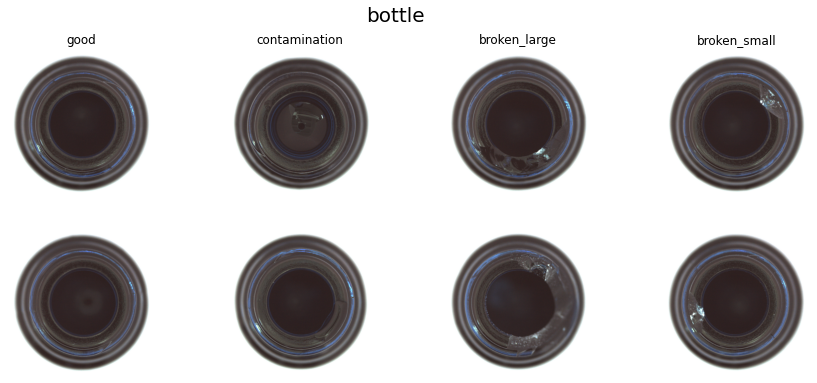

In [ ]:
for cls in train_df['class'].unique():
    visualize(train_df[train_df['class'] == cls].reset_index(drop=True))